In [3]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fontsize = 24
plt.rcParams['xtick.labelsize'] = 20 
plt.rcParams['ytick.labelsize'] = 20 

plt.rcParams.update({
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}'
})

In [4]:
file2read = netCDF4.Dataset(f'/scratch/09909/smata/wrf_les_sweep/runs/grid_study/dx_4m/wrfout_d02_0001-01-01_00_00_00','r',mmap=False) # type: ignore # Read Netcdf-type WRF output file
file2read.variables.keys()

# Field variables
dx = file2read.getncattr('DX')
dy = file2read.getncattr('DY')
dt = file2read.getncattr('DT')
Nx = file2read.getncattr('WEST-EAST_PATCH_END_UNSTAG')
Ny = file2read.getncattr('SOUTH-NORTH_PATCH_END_UNSTAG')
Nz = file2read.getncattr('BOTTOM-TOP_PATCH_END_UNSTAG')
Nt = file2read.variables['Times'].shape[0]

Ts = 0
Te = Nt
Nt = Te - Ts

# Wind turbine variables
thrust_dx4    = file2read.variables['WTP_THRUST'      ][Ts:Te,:]
power_dx4     = file2read.variables['WTP_POWER_MECH'  ][Ts:Te,:]
ct_dx4        = file2read.variables['WTP_THRUST_COEFF'][Ts:Te,:]
cp_dx4        = file2read.variables['WTP_POWER_COEFF' ][Ts:Te,:]

timeseries_dx4 = np.arange(len(thrust_dx4)) * 10 / 60

In [5]:
file2read = netCDF4.Dataset(f'/scratch/09909/smata/wrf_les_sweep/runs/grid_study/dx_8m/wrfout_d02_0001-01-01_00_00_00','r',mmap=False) # type: ignore # Read Netcdf-type WRF output file
file2read.variables.keys()

# Field variables
dx = file2read.getncattr('DX')
dy = file2read.getncattr('DY')
dt = file2read.getncattr('DT')
Nx = file2read.getncattr('WEST-EAST_PATCH_END_UNSTAG')
Ny = file2read.getncattr('SOUTH-NORTH_PATCH_END_UNSTAG')
Nz = file2read.getncattr('BOTTOM-TOP_PATCH_END_UNSTAG')
Nt = file2read.variables['Times'].shape[0]

Ts = 0
Te = Nt
Nt = Te - Ts

# Wind turbine variables
thrust_dx8    = file2read.variables['WTP_THRUST'      ][Ts:Te,:]
power_dx8     = file2read.variables['WTP_POWER_MECH'  ][Ts:Te,:]
ct_dx8        = file2read.variables['WTP_THRUST_COEFF'][Ts:Te,:]
cp_dx8        = file2read.variables['WTP_POWER_COEFF' ][Ts:Te,:]

timeseries_dx8 = np.arange(len(thrust_dx8)) * 10 / 60

In [6]:
file2read = netCDF4.Dataset(f'/scratch/09909/smata/wrf_les_sweep/runs/grid_study/dx_16m/wrfout_d02_0001-01-01_00_00_00','r',mmap=False) # type: ignore # Read Netcdf-type WRF output file
file2read.variables.keys()

# Field variables
dx = file2read.getncattr('DX')
dy = file2read.getncattr('DY')
dt = file2read.getncattr('DT')
Nx = file2read.getncattr('WEST-EAST_PATCH_END_UNSTAG')
Ny = file2read.getncattr('SOUTH-NORTH_PATCH_END_UNSTAG')
Nz = file2read.getncattr('BOTTOM-TOP_PATCH_END_UNSTAG')
Nt = file2read.variables['Times'].shape[0]

Ts = 0
Te = Nt
Nt = Te - Ts

# Wind turbine variables
thrust_dx16    = file2read.variables['WTP_THRUST'      ][Ts:Te,:]
power_dx16     = file2read.variables['WTP_POWER_MECH'  ][Ts:Te,:]
ct_dx16        = file2read.variables['WTP_THRUST_COEFF'][Ts:Te,:]
cp_dx16        = file2read.variables['WTP_POWER_COEFF' ][Ts:Te,:]

timeseries_dx16 = np.arange(len(thrust_dx16)) * 10 / 60

Text(15, 7900, '7.34%')

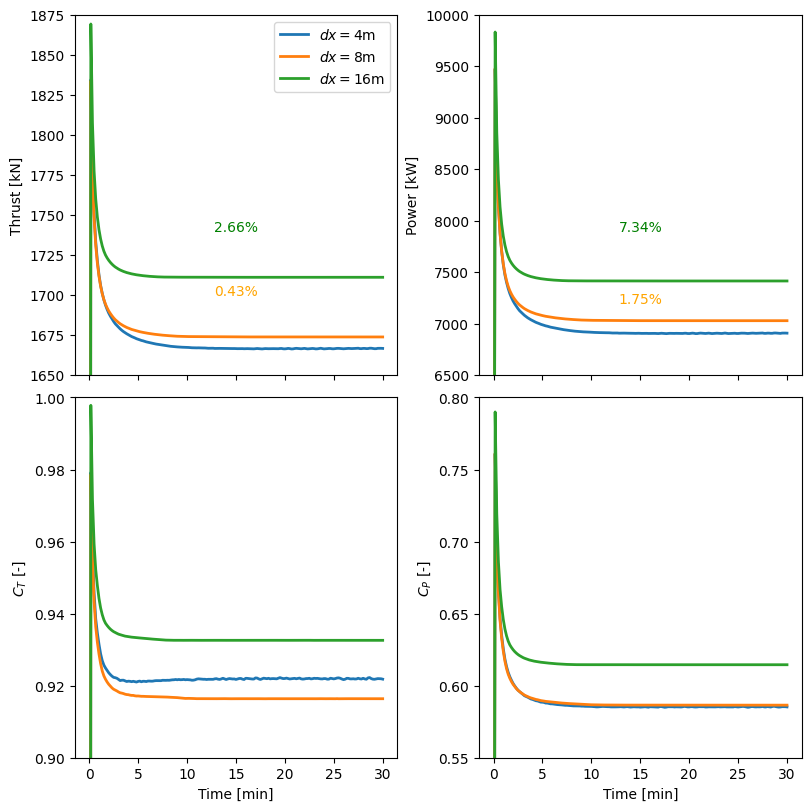

In [50]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), constrained_layout=True,sharex=True)

ax[0,0].plot(timeseries_dx4,thrust_dx4/1000,linestyle='solid',linewidth=2,label='$dx = 4$m')
ax[0,0].plot(timeseries_dx8,thrust_dx8/1000,linestyle='solid',linewidth=2,label='$dx = 8$m')
ax[0,0].plot(timeseries_dx16,thrust_dx16/1000,linestyle='solid',linewidth=2,label='$dx = 16$m')
ax[0,0].set_ylabel('Thrust [kN]')
ax[0,0].set_ylim([1650, 1875])
ax[0,0].legend()

ax[0,1].plot(timeseries_dx4,power_dx4/1000,linestyle='solid',linewidth=2,label='$dx = 4$m')
ax[0,1].plot(timeseries_dx8,power_dx8/1000,linestyle='solid',linewidth=2,label='$dx = 8$m')
ax[0,1].plot(timeseries_dx16,power_dx16/1000,linestyle='solid',linewidth=2,label='$dx = 16$m')
ax[0,1].set_ylabel('Power [kW]')
ax[0,1].set_ylim([6500, 10000])

ax[1,0].plot(timeseries_dx4,ct_dx4,linestyle='solid',linewidth=2,label='$dx = 4$m')
ax[1,0].plot(timeseries_dx8,ct_dx8,linestyle='solid',linewidth=2,label='$dx = 8$m')
ax[1,0].plot(timeseries_dx16,ct_dx16,linestyle='solid',linewidth=2,label='$dx = 16$m')
ax[1,0].set_ylabel('$C_T$ [-]')
ax[1,0].set_xlabel('Time [min]')
ax[1,0].set_ylim([0.9, 1])

ax[1,1].plot(timeseries_dx4,cp_dx4,linestyle='solid',linewidth=2,label='$dx = 4$m')
ax[1,1].plot(timeseries_dx8,cp_dx8,linestyle='solid',linewidth=2,label='$dx = 8$m')
ax[1,1].plot(timeseries_dx16,cp_dx16,linestyle='solid',linewidth=2,label='$dx = 16$m')
ax[1,1].set_ylabel('$C_P$ [-]')
ax[1,1].set_xlabel('Time [min]')
ax[1,1].set_ylim([0.55, 0.8])

ax[0,0].text(15,1700, f'{(((thrust_dx8.compressed()[-1] - thrust_dx4.compressed()[-1])/ thrust_dx4.compressed()[-1])*100):0.2f}%', ha='center', fontsize=10,rotation=0,color='orange')
ax[0,0].text(15,1740, f'{(((thrust_dx16.compressed()[-1] - thrust_dx4.compressed()[-1])/ thrust_dx4.compressed()[-1])*100):0.2f}%', ha='center', fontsize=10,rotation=0,color='green')

ax[0,1].text(15,7200, f'{(((power_dx8.compressed()[-1] - power_dx4.compressed()[-1])/ power_dx4.compressed()[-1])*100):0.2f}%', ha='center', fontsize=10,rotation=0,color='orange')
ax[0,1].text(15,7900, f'{(((power_dx16.compressed()[-1] - power_dx4.compressed()[-1])/ power_dx4.compressed()[-1])*100):0.2f}%', ha='center', fontsize=10,rotation=0,color='green')


In [30]:
(power_dx8[-1] - power_dx4[-1])/ power_dx4[-1]

masked_array(data=[0.0175201203674078],
             mask=[False],
       fill_value=np.float64(1e+20),
            dtype=float32)

In [42]:
power_dx8.compressed()[-1]

np.float32(7028652.0)